In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("delivery_time.csv")
df.head(21)


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.shape[0]
#no. of rows

21

In [5]:
df.isnull().sum()#to find out if there are missing values

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
df.dtypes
# continous type of data

Delivery Time    float64
Sorting Time       int64
dtype: object

# Visualization

In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

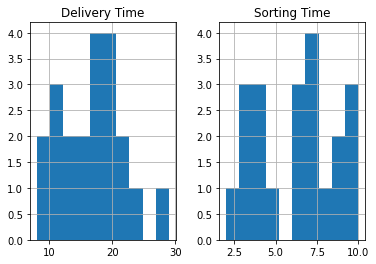

In [8]:
df.hist()

<AxesSubplot:>

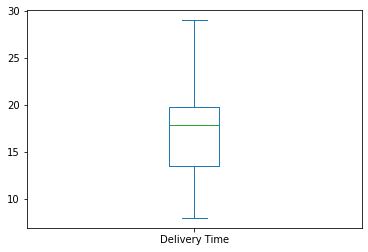

In [9]:
df['Delivery Time'].plot.box()

<AxesSubplot:>

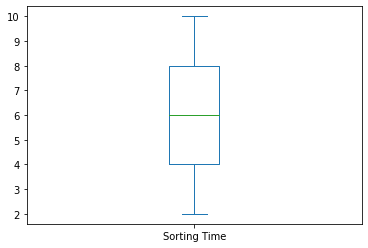

In [10]:
df['Sorting Time'].plot.box()

In [11]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

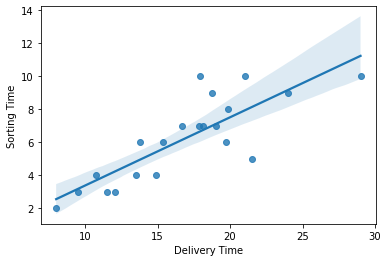

In [12]:
import seaborn as sns
sns.regplot(x=df['Delivery Time'],y=df['Sorting Time'])

C:\Users\d970668\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

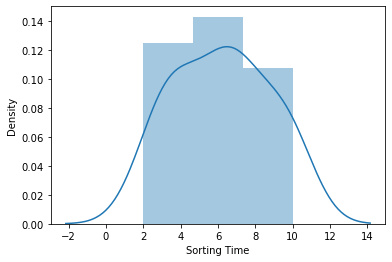

In [13]:

sns.distplot(df['Sorting Time'])


C:\Users\d970668\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

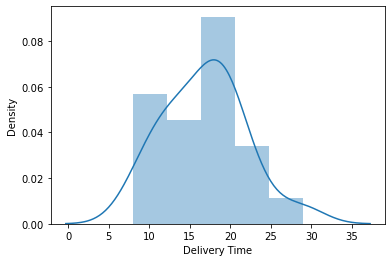

In [14]:
sns.distplot(df['Delivery Time'])


# Modeling

In [18]:
import statsmodels.formula.api as smf
df = df.rename({'Delivery Time' : 'delivery_time' ,'Sorting Time' : 'sorting_time'}, axis=1)
model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        21:30:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823   

In [20]:
model.params


Intercept       6.582734
sorting_time    1.649020
dtype: float64

# Testing

In [22]:
Del_time = 6.582734 + (1.649020*5)
Del_time

14.827834

In [24]:
new_data=pd.Series([3.5,5.5])
new_data

0    3.5
1    5.5
dtype: float64

In [25]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,3.5
1,5.5


In [26]:
model.predict(data_pred)

0    12.354304
1    15.652343
dtype: float64